<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

<ipython-input-1-7dd3504c366f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [ ]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


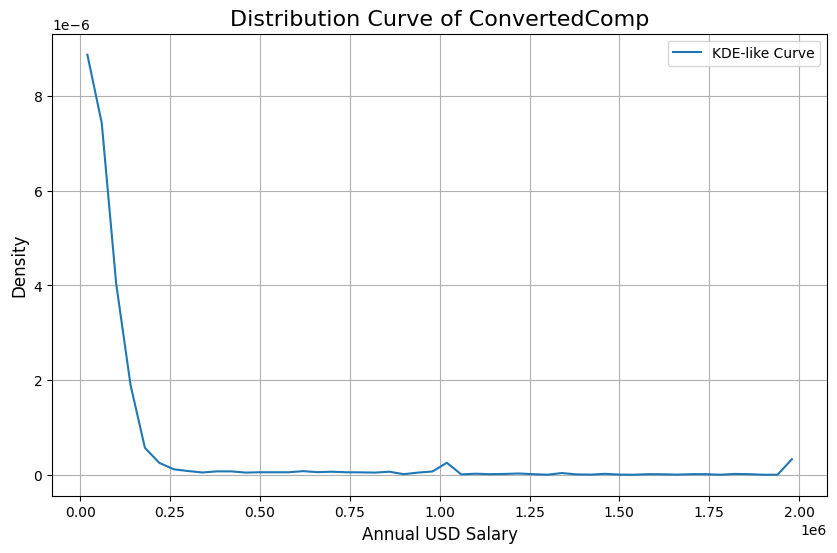

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

file_name = "m2_survey_data.csv"

try:
    df = pd.read_csv(file_name)
    converted_comp = df['ConvertedComp'].dropna()

    data = converted_comp
    density, bins = np.histogram(data, bins=50, density=True)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])

    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, density, label="KDE-like Curve")
    plt.title('Distribution Curve of ConvertedComp', fontsize=16)
    plt.xlabel('Annual USD Salary', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
except KeyError:
    print("Error: 'ConvertedComp' column not found in the dataset.")

Plot the histogram for the column `ConvertedComp`.


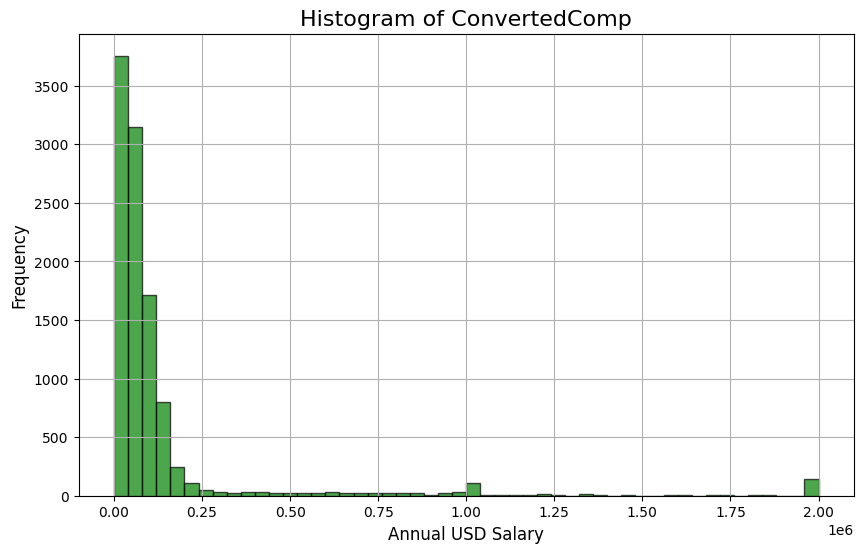

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "m2_survey_data.csv"

try:
    df = pd.read_csv(file_name)
    converted_comp = df['ConvertedComp'].dropna()

    plt.figure(figsize=(10, 6))
    plt.hist(converted_comp, bins=50, alpha=0.7, color='green', edgecolor='black')
    plt.title('Histogram of ConvertedComp', fontsize=16)
    plt.xlabel('Annual USD Salary', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
except KeyError:
    print("Error: 'ConvertedComp' column not found in the dataset.")



What is the median of the column `ConvertedComp`?


In [21]:
try:
    median_value = converted_comp.median()
    print(f"The median of the ConvertedComp column is: {median_value}")
except NameError:
    print("The data has not been loaded or the 'ConvertedComp' column is missing.")



The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [22]:
try:
    man_responders = df[df['Gender'] == 'Man'].shape[0]
    print(f"The number of responders who identified themselves only as a 'Man' is: {man_responders}")
except KeyError:
    print("The 'Gender' column is not found in the dataset.")

The number of responders who identified themselves only as a 'Man' is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [23]:
try:
    woman_responders = df[df['Gender'] == 'Woman'].shape[0]
    print(f"The number of responders who identified themselves only as a 'Woman' is: {woman_responders}")
except KeyError:
    print("The 'Gender' column is not found in the dataset.")


The number of responders who identified themselves only as a 'Woman' is: 731


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [28]:
print(df.columns.tolist())

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

In [30]:
df.columns = df.columns.str.strip()

In [31]:
five_number_summary = {
    "Minimum": df['Age'].min(),
    "Q1 (25th Percentile)": df['Age'].quantile(0.25),
    "Median (50th Percentile)": df['Age'].median(),
    "Q3 (75th Percentile)": df['Age'].quantile(0.75),
    "Maximum": df['Age'].max()
}
print(five_number_summary)

{'Minimum': 16.0, 'Q1 (25th Percentile)': 25.0, 'Median (50th Percentile)': 29.0, 'Q3 (75th Percentile)': 35.0, 'Maximum': 99.0}


Plot a histogram of the column `Age`.


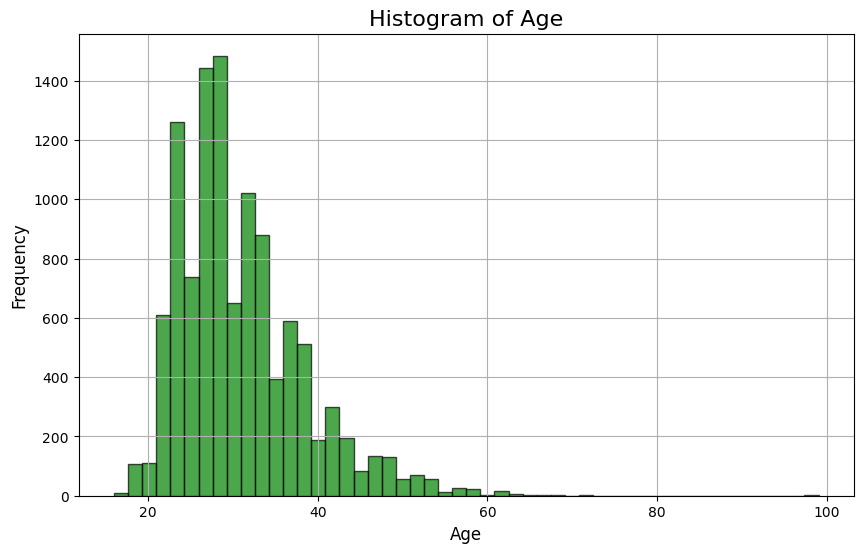

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "m2_survey_data.csv"

try:
    df = pd.read_csv(file_name)

    if 'Age' in df.columns:
        age_data = df['Age'].dropna()
        plt.figure(figsize=(10, 6))
        plt.hist(age_data, bins=50, alpha=0.7, color='green', edgecolor='black')
        plt.title('Histogram of Age', fontsize=16)
        plt.xlabel('Age', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.grid(True)
        plt.show()
    else:
        print("Error: 'Age' column not found in the dataset.")

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
except KeyError:
    print("Error: 'Age' column not found in the dataset.")


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


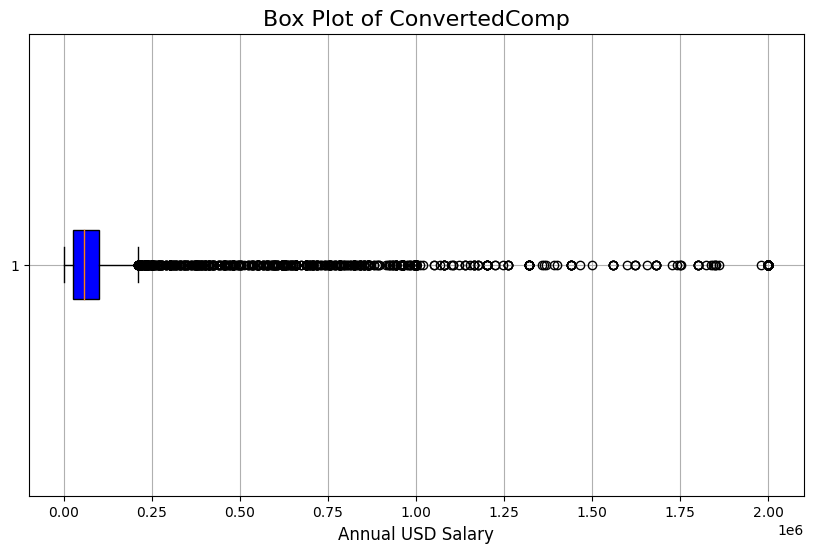

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

file_name = "m2_survey_data.csv"

try:
    df = pd.read_csv(file_name)
    converted_comp = df['ConvertedComp'].dropna()
    
    plt.figure(figsize=(10, 6))
    plt.boxplot(converted_comp, vert=False, patch_artist=True, boxprops=dict(facecolor="blue", color="black"))
    plt.title('Box Plot of ConvertedComp', fontsize=16)
    plt.xlabel('Annual USD Salary', fontsize=12)
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"Error: File '{file_name}' not found.")
except KeyError:
    print("Error: 'ConvertedComp' column not found in the dataset.")


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [34]:

try:
    Q1 = converted_comp.quantile(0.25)  
    Q3 = converted_comp.quantile(0.75)  
    IQR = Q3 - Q1  # Interquartile Range
    print(f"Interquartile Range (IQR) for ConvertedComp: {IQR}")
except NameError:
    print("The 'ConvertedComp' data is not available. Ensure the dataset is loaded correctly.")



Interquartile Range (IQR) for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [35]:
try:
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
except NameError:
    print("The Interquartile Range (IQR) or quartile values are not available. Ensure the calculations are done correctly.")

Lower Bound: -82830.0
Upper Bound: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [36]:
try:
    outliers = converted_comp[(converted_comp < lower_bound) | (converted_comp > upper_bound)]
    num_outliers = len(outliers)
    print(f"Number of outliers in the ConvertedComp column: {num_outliers}")
except NameError:
    print("Ensure the bounds and the 'ConvertedComp' data are calculated and available.")



Number of outliers in the ConvertedComp column: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [38]:
try:
    df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
    print(f"New DataFrame created with {len(df_no_outliers)} rows after removing outliers.")
except KeyError:
    print("The 'ConvertedComp' column is missing in the dataset.")
except NameError:
    print("Ensure the bounds and the original DataFrame are properly defined.")


New DataFrame created with 9703 rows after removing outliers.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [39]:
try:
    numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64'])
    age_correlation = numerical_columns.corr()['Age'].sort_values(ascending=False)
    print("Correlation between Age and other numerical columns:")
    print(age_correlation)
except KeyError:
    print("The 'Age' column or numerical data is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")



Correlation between Age and other numerical columns:
Age              1.000000
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CompTotal        0.006337
Respondent       0.002180
CodeRevHrs      -0.012878
Name: Age, dtype: float64


In [41]:
#median ConvertedComp for respondents who identified as 'Woman'
try:
    median_convertedcomp_woman = df_no_outliers[df_no_outliers['Gender'] == 'Woman']['ConvertedComp'].median()
    print(f"The median ConvertedComp of respondents who identified as 'Woman': {median_convertedcomp_woman}")
except KeyError:
    print("The 'Gender' or 'ConvertedComp' column is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")

The median ConvertedComp of respondents who identified as 'Woman': 54956.0


In [42]:
# Calculate the median ConvertedComp after removing outliers
try:
    median_convertedcomp_no_outliers = df_no_outliers['ConvertedComp'].median()
    print(f"The median ConvertedComp after removing outliers: {median_convertedcomp_no_outliers}")
except KeyError:
    print("The 'ConvertedComp' column is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The median ConvertedComp after removing outliers: 52704.0


In [43]:
#Outliers below Q1 for the 'Age' column using the boxplot method
try:
    Q1_age = df['Age'].quantile(0.25)
    IQR_age = df['Age'].quantile(0.75) - Q1_age
    lower_bound_age = Q1_age - 1.5 * IQR_age

    # Count the number of outliers below Q1
    outliers_below_q1_age = df[df['Age'] < lower_bound_age]
    num_outliers_below_q1_age = len(outliers_below_q1_age)
    print(f"Number of outliers below Q1 for 'Age': {num_outliers_below_q1_age}")
except KeyError:
    print("The 'Age' column is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Number of outliers below Q1 for 'Age': 0


In [44]:
# mean ConvertedComp after removing outliers
try:
    mean_convertedcomp_no_outliers = df_no_outliers['ConvertedComp'].mean()
    print(f"The mean ConvertedComp after removing outliers: {mean_convertedcomp_no_outliers}")
except KeyError:
    print("The 'ConvertedComp' column is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The mean ConvertedComp after removing outliers: 59883.20838915799


In [45]:
# columns with a negative correlation with 'Age'
try:
    numerical_columns = df_no_outliers.select_dtypes(include=['float64', 'int64'])
    correlations_with_age = numerical_columns.corr()['Age']
    negative_correlation_columns = correlations_with_age[correlations_with_age < 0]
    print("Columns with a negative correlation with 'Age':")
    print(negative_correlation_columns)
except KeyError:
    print("The 'Age' column or numerical data is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")

Columns with a negative correlation with 'Age':
CodeRevHrs   -0.012878
Name: Age, dtype: float64


In [46]:
#Column with the highest correlation with 'Age'
try:
    correlations_with_age = df_no_outliers.select_dtypes(include=['float64', 'int64']).corr()['Age']
    highest_correlation_column = correlations_with_age.sort_values(ascending=False).index[1]  # Exclude 'Age' itself
    highest_correlation_value = correlations_with_age.sort_values(ascending=False).iloc[1]
    print(f"The column with the highest correlation with 'Age' is '{highest_correlation_column}' with a correlation of {highest_correlation_value:.2f}.")
except KeyError:
    print("The 'Age' column or numerical data is missing in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


The column with the highest correlation with 'Age' is 'ConvertedComp' with a correlation of 0.40.


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
